In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

coeficeints: [ 7.46365085 29.09137921]
Custom RMSE: 13.83, Rsquared: 0.80
Sklearn RMSE: 13.83, Rsquared: 0.80


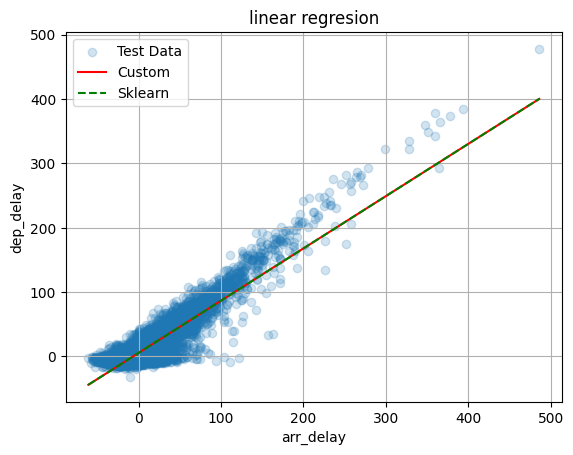

coeficeints: [ 7.46365085 26.12423215  5.14166694]
Custom RMSE: 13.14, Rsquared: 0.82
Sklearn RMSE: 13.14, Rsquared: 0.82


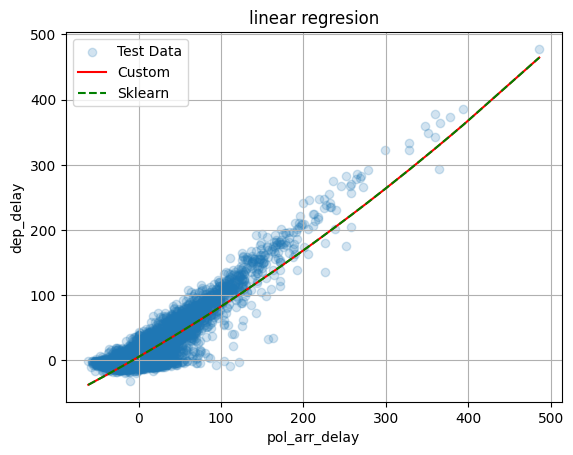

coeficeints: [1031.20598631  -55.42916015]
Custom RMSE: 726.62, Rsquared: 0.01
Sklearn RMSE: 726.62, Rsquared: 0.01


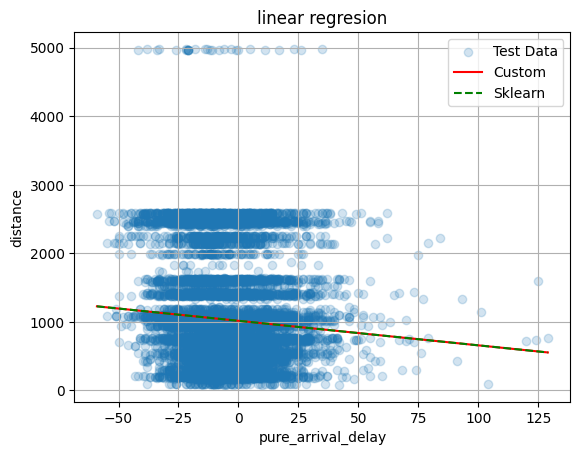

coeficeints: [10.27825401 -1.73436851 -0.20206234 -0.94227315 -2.53302898  2.46285749
  0.16816614 -0.10267399 -0.25360382 -1.45797966  0.01901595 -1.22907617
 -2.65671135 -0.92168123  0.3519052   0.12337093]
Custom RMSE: 35.88, Rsquared: 0.02
Sklearn RMSE: 35.88, Rsquared: 0.02


<ipython-input-4-2c34e56717da>:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='carrier', y='dep_delay', ci=None)


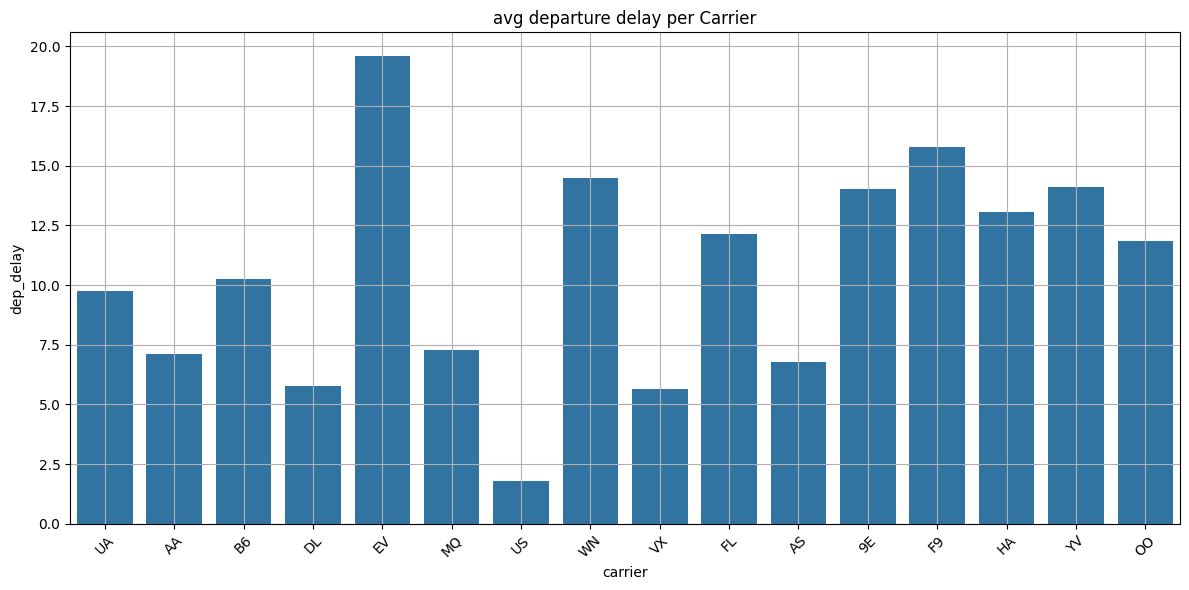

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def lin_reg(X_train, X_test, y_train, y_test, name_x, name_y, cat=False):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_b_train = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_b_test = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
    theta = np.zeros((X_b_train.shape[1], 1))

    # hyper param
    learning_rate = 0.01
    n_iterations = 1000
    m = X_b_train.shape[0]

    losses = []

    for i in range(n_iterations):
        y_pred = X_b_train.dot(theta)
        error = y_pred - y_train
        gradients = (2/m) * X_b_train.T.dot(error)
        theta -= learning_rate * gradients
        loss = np.mean(error ** 2)
        losses.append(loss)

    print(f"coeficeints: {theta.ravel()}")

    # eval
    y_test_pred_custom = X_b_test.dot(theta)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_custom))
    r2 = r2_score(y_test, y_test_pred_custom)
    print(f"Custom RMSE: {rmse:.2f}, Rsquared: {r2:.2f}")

    # scikit learn model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_test_pred_sklearn = lin_reg.predict(X_test)

    rmse_sk = np.sqrt(mean_squared_error(y_test, y_test_pred_sklearn))
    r2_sk = r2_score(y_test, y_test_pred_sklearn)
    print(f"Sklearn RMSE: {rmse_sk:.2f}, Rsquared: {r2_sk:.2f}")

# viz
    if not cat:
      plt.scatter(X_test[:, 0], y_test, alpha=0.2, label="Test Data")

      sorted_idx = X_test[:, 0].argsort()
      plt.plot(X_test[:, 0][sorted_idx], y_test_pred_custom[sorted_idx], color='red', label='Custom')
      plt.plot(X_test[:, 0][sorted_idx], y_test_pred_sklearn[sorted_idx], color='green', linestyle='--', label='Sklearn')

      plt.xlabel(name_x)
      plt.ylabel(name_y)
      plt.title("linear regresion")
      plt.legend()
      plt.grid(True)
      plt.show()
    else:
      plt.figure(figsize=(12, 6))
      sns.barplot(data=df, x='carrier', y='dep_delay', ci=None)
      plt.xticks(rotation=45)
      plt.title("avg departure delay per Carrier")
      plt.ylabel("dep_delay")
      plt.xlabel("carrier")
      plt.grid(True)
      plt.tight_layout()
      plt.show()

####### linear regresion with arr_delay and dep_delay  #######

df = pd.read_csv("flights.csv")
df = df[['arr_delay', 'dep_delay', 'distance']].dropna()
df['pure_arrival_delay'] = df['arr_delay'] - df['dep_delay']

X = df[['arr_delay']].values
y = df[['dep_delay']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg(X_train, X_test, y_train, y_test, 'arr_delay', 'dep_delay')
####### 2 attempt with polynomial gets ver very slightly better results #######
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lin_reg(X_train, X_test, y_train, y_test, 'pol_arr_delay', 'dep_delay')

####### linear regresion with distnace and pure_arrival_delay  #######

X = df[['pure_arrival_delay']].values
y = df[['distance']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg(X_train, X_test, y_train, y_test, 'pure_arrival_delay', 'distance')

####### categorical experiments (bad not succesfull:() #######
df = pd.read_csv("flights.csv")
df = df[['carrier', 'dep_delay']].dropna()

X = df[['carrier']]
y = df[['dep_delay']].values

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['carrier'])
], remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
lin_reg(X_train, X_test, y_train, y_test, '', '', True)
